In [1]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

<html> <center> <br> <br> <br> <br>  R&D department investment analysis for <font color = 'red'> <u> Japan   <br> <br> <br> <br> 

In [51]:
#R & D Investments as a % of GDP

Net_ODA_Japan = pd.read_csv('Net_ODA.csv') 

In [52]:
Net_ODA_Japan = Net_ODA_Japan.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

# Renaming a few columns
Net_ODA_Japan.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions', 'TIME': 'Time'}, inplace = True)

#R_D_Investments_2000  = R_D_Investments_1_2000[R_D_Investments_1_2000.Code != 'EU28'] 


Net_ODA_Japan = Net_ODA_Japan.query('Code == "JPN"')


len(Net_ODA_Japan)

18

In [53]:
Net_ODA_Japan

,Code,Time,Millions
249,JPN,2000,0.280972
250,JPN,2001,0.231959
251,JPN,2002,0.228355
252,JPN,2003,0.202931
253,JPN,2004,0.187485
254,JPN,2005,0.280759
255,JPN,2006,0.248231
256,JPN,2007,0.170144
257,JPN,2008,0.190409
258,JPN,2009,0.182736


In [54]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
#gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)



gdp_ppp_jpn = load_from_wbdata('JPN', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2000, 2017)


In [55]:
gdp_ppp_jpn.reset_index(level=0, inplace=True)

In [56]:
gdp_ppp_jpn

,date,gdp_ppp
0,2017,38907.368137
1,2016,38108.405693
2,2015,37834.053406
3,2014,37337.317406
4,2013,37148.602750
5,2012,36367.597055
6,2011,35774.696713
7,2010,35749.756679
8,2009,34317.670825
9,2008,36278.369473


In [57]:
Net_ODA_Japan.rename(columns ={'Time': 'date'}, inplace = True)

In [58]:
Net_ODA_Japan

,Code,date,Millions
249,JPN,2000,0.280972
250,JPN,2001,0.231959
251,JPN,2002,0.228355
252,JPN,2003,0.202931
253,JPN,2004,0.187485
254,JPN,2005,0.280759
255,JPN,2006,0.248231
256,JPN,2007,0.170144
257,JPN,2008,0.190409
258,JPN,2009,0.182736


In [62]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2.astype({'date': 'int64'}), on='date')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 

combined_Net_ODA_Japan = merge_df_onCode(Net_ODA_Japan, gdp_ppp_jpn)

#combined_ODA_Production_2015_cleaned = merge_df_onCode(ODA_Production_2015_cleaned, gdp_ppp_prod)




In [63]:
combined_Net_ODA_Japan = combined_Net_ODA_Japan.query('gdp_ppp >= 0')

In [65]:
combined_Net_ODA_Japan

,Code,date,Millions,gdp_ppp
0,JPN,2000,0.280972,33871.858217
1,JPN,2001,0.231959,33927.643635
2,JPN,2002,0.228355,33888.783481
3,JPN,2003,0.202931,34333.133675
4,JPN,2004,0.187485,35078.261990
5,JPN,2005,0.280759,35658.148666
6,JPN,2006,0.248231,36141.585235
7,JPN,2007,0.170144,36697.240899
8,JPN,2008,0.190409,36278.369473
9,JPN,2009,0.182736,34317.670825


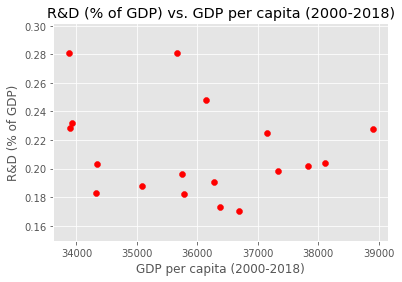

In [66]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_Net_ODA_Japan = show_scatterplot(combined_Net_ODA_Japan, ['gdp_ppp', 'Millions'], 'r',
                                    'R&D (% of GDP) vs. GDP per capita (2000-2018)', 'GDP per capita (2000-2018)',
                                    'R&D (% of GDP)')

In [67]:
column_1 = combined_Net_ODA_Japan["Millions"]
column_2 = combined_Net_ODA_Japan["gdp_ppp"]
correlation = column_1.corr(column_2)

In [68]:
correlation

-0.21633897005880492

In [69]:
#perform OLS 
model_combined_Net_ODA_Japan = smf.ols(formula='gdp_ppp ~ Millions', data=combined_Net_ODA_Japan).fit()
model_combined_Net_ODA_Japan.summary()

C:\Users\prana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_ppp   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.7856
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.389
Time:                        22:43:38   Log-Likelihood:                -156.64
No. Observations:                  18   AIC:                             317.3
Df Residuals:                      16   BIC:                             319.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.809e+04   2423.324     15.719      0.000     3.3e+04    4.32e+04
Millions   -1.003e+04   1.13e+04     -0.886      0.389    -3.4e+04     1.4e+04
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.796
Skew:                           0.331   Prob(JB):                        0.672
Kurtosis:                       2.210   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<html> <center> <br> <br> <br> <br>  Net ODA for <font color = 'red'> <u> Germany  <br> <br> <br> <br> 

In [70]:
#R & D Investments as a % of GDP

Net_ODA_Germany = pd.read_csv('Net_ODA.csv') 

In [71]:
Net_ODA_Germany = Net_ODA_Germany.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

# Renaming a few columns
Net_ODA_Germany.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions', 'TIME': 'Time'}, inplace = True)

#R_D_Investments_2000  = R_D_Investments_1_2000[R_D_Investments_1_2000.Code != 'EU28'] 


Net_ODA_Germany = Net_ODA_Germany.query('Code == "DEU"')


len(Net_ODA_Germany)


18

In [72]:
Net_ODA_Germany

,Code,Time,Millions
144,DEU,2000,0.270087
145,DEU,2001,0.271007
146,DEU,2002,0.267909
147,DEU,2003,0.284017
148,DEU,2004,0.276065
149,DEU,2005,0.360351
150,DEU,2006,0.356039
151,DEU,2007,0.366854
152,DEU,2008,0.382826
153,DEU,2009,0.354919


In [73]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
#gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)



gdp_ppp_germany = load_from_wbdata('DEU', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2000, 2018)


In [74]:
gdp_ppp_germany

,gdp_ppp
date,
2018,45936.182713
2017,45393.385455
2016,44467.218788
2015,43849.769235
2014,43474.675155
2013,42705.791527
2012,42639.892427
2011,42541.531088
2010,40183.348524


In [76]:

# Renaming a few column
gdp_ppp_germany.rename(index ={'date': 'Code'}, inplace = True)

In [77]:
gdp_ppp_germany.reset_index(level=0, inplace=True)

gdp_ppp_germany.rename(index ={'date': 'Code'}, inplace = True)

Net_ODA_Germany.rename(columns ={'Time': 'date'}, inplace = True)

In [78]:
Net_ODA_Germany = Net_ODA_Germany.sort_values(by=['date'], ascending=False)

In [79]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2.astype({'date': 'int64'}), on='date')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 

combined_Net_ODA_Germany = merge_df_onCode(Net_ODA_Germany, gdp_ppp_germany)

#combined_ODA_Production_2015_cleaned = merge_df_onCode(ODA_Production_2015_cleaned, gdp_ppp_prod)

In [80]:
combined_Net_ODA_Germany
combined_Net_ODA_Germany = combined_Net_ODA_Germany.sort_values(by=['date'])

In [81]:
combined_Net_ODA_Germany

,Code,date,Millions,index,gdp_ppp
17,DEU,2000,0.270087,18,36698.843352
16,DEU,2001,0.271007,17,37259.159385
15,DEU,2002,0.267909,16,37122.748856
14,DEU,2003,0.284017,15,36837.465531
13,DEU,2004,0.276065,14,37283.893375
12,DEU,2005,0.360351,13,37574.356574
11,DEU,2006,0.356039,12,39051.687928
10,DEU,2007,0.366854,11,40270.834069
9,DEU,2008,0.382826,10,40735.729274
8,DEU,2009,0.354919,9,38512.413551


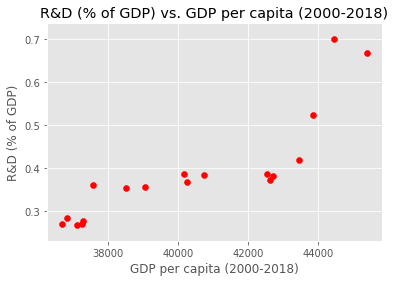

In [82]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_Net_ODA_Germany = show_scatterplot(combined_Net_ODA_Germany, ['gdp_ppp', 'Millions'], 'r',
                                    'R&D (% of GDP) vs. GDP per capita (2000-2018)', 'GDP per capita (2000-2018)',
                                    'R&D (% of GDP)')

In [83]:
column_1 = combined_Net_ODA_Germany["Millions"]
column_2 = combined_Net_ODA_Germany["gdp_ppp"]
correlation = column_1.corr(column_2)

In [84]:
correlation

0.8445116203693125

In [85]:
#perform OLS 
model_combined_Net_ODA_Germany = smf.ols(formula='gdp_ppp ~ Millions', data=combined_Net_ODA_Germany).fit()
model_combined_Net_ODA_Germany.summary()

C:\Users\prana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_ppp   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     39.79
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.04e-05
Time:                        23:45:20   Log-Likelihood:                -157.60
No. Observations:                  18   AIC:                             319.2
Df Residuals:                      16   BIC:                             321.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.255e+04   1297.211     25.093      0.000    2.98e+04    3.53e+04
Millions    2.003e+04   3175.033      6.308      0.000    1.33e+04    2.68e+04
==============================================================================
Omnibus:                        1.986   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.509
Skew:                           0.542   Prob(JB):                        0.470
Kurtosis:                       2.085   Cond. No.                         9.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""